## 特征工程

### 定义：

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied Machine Learning" is basically feature enginnering.  ----Pro. Andrew Ng(吴恩达)

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in imporved model accuracy on unseen data.  ----Dr.Jason Brownlee

数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。

### 特征编码

#### 1. 数值化数据

将特征中的数据用数值代替，从而能够参与运算。

In [1]:
import pandas as pd
students = pd.DataFrame({"name":["Facebook", "Google", "Twitter", "Alpple"], 'class':['one', 'two', 'three', 'one']})
students

,name,class
0,Facebook,one
1,Google,two
2,Twitter,three
3,Alpple,one


In [5]:
students['class'].replace({"one":1, "two":2, "three":3}, inplace=True)

In [6]:
students

,name,class
0,Facebook,1
1,Google,2
2,Twitter,3
3,Alpple,1


In [7]:
students.dtypes

name     object
class     int64
dtype: object

注意：数值化后，有的数据会出现了大小的比较，但事实上不一定各个数据之间有大小比较的意义。

In [11]:
persons = pd.DataFrame({"name":["Newton", "Andrew Ng", "Jodan", "Bill Gates"], 'color':['white', 'yellow', 'black', 'white']})
persons

,name,color
0,Newton,white
1,Andrew Ng,yellow
2,Jodan,black
3,Bill Gates,white


In [14]:
persons.replace({"black": 0, 'white': 1, 'yellow': 2})
#这里不能认为数值就代表了任何顺序或者等级

,name,color
0,Newton,1
1,Andrew Ng,2
2,Jodan,0
3,Bill Gates,1


In [28]:
from sklearn.preprocessing import LabelEncoder    #利用LabelEncoder实现对具有类别的数据进行数值化编码
le = LabelEncoder()
labels = le.fit_transform(persons['color'])
persons['color'] = labels
persons

,name,color
0,Newton,1
1,Andrew Ng,2
2,Jodan,0
3,Bill Gates,1


以上情况下，简单地数值化，显然不适合了，而persons里的数据，其实是分类数据，对于分类数据，通常采用的方式是二值化，或者说离散化。

#### 2. 类别型数据

In [15]:
persons

,name,color
0,Newton,white
1,Andrew Ng,yellow
2,Jodan,black
3,Bill Gates,white


In [19]:
df_dum = pd.get_dummies(persons['color'])   #创建哑变量dummy,虚拟变量
df_dum

,black,white,yellow
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0


In [20]:
persons.merge(df_dum, left_index=True, right_index=True)     #将两个DF合并

,name,color,black,white,yellow
0,Newton,white,0,1,0
1,Andrew Ng,yellow,0,0,1
2,Jodan,black,1,0,0
3,Bill Gates,white,0,1,0


用上面的方式，将分类特征以1和0表示，是比较适合的。但是，我们可能会遇到一种情况，新建立的哑变量之间可能会有线性相关性。比如：

In [21]:
students = pd.DataFrame({"gender": ["men", 'women', 'women', 'men', 'women'], 'name':["zhang", 'wang', 'zhao', 'qian','sun']})
students

,gender,name
0,men,zhang
1,women,wang
2,women,zhao
3,men,qian
4,women,sun


In [25]:
pd.concat([students, pd.get_dummies(students['gender'])], axis=1,)

,gender,name,men,women
0,men,zhang,1,0
1,women,wang,0,1
2,women,zhao,0,1
3,men,qian,1,0
4,women,sun,0,1


对于以上结果，men或者women只要一列即可。

In [26]:
pd.concat([students, pd.get_dummies(students['gender'], drop_first='True')], axis=1)

,gender,name,women
0,men,zhang,0
1,women,wang,1
2,women,zhao,1
3,men,qian,0
4,women,sun,1


这种方式，称为one-hot编码。实现one-hot编码的方式，还有另外一种方法。

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
features = ohe.fit_transform(students[['gender']])
features.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

可以实施one-hot编码的特征，通常是离散型的，也就是具有类别的数据。

#### 3. 二值化

与之类似的，还有一种被称为“二值化”的特征编码，它可以用来处理离散型特征，也可以用来处理连续型特征。

二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0，公式表达如下：

```
    |1(x>threshold)
x = | 
    |0(x<=threshold)
```

In [33]:
pm25 = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/pm25/pm2.csv")
pm25.describe()

,RANK,CITY_ID,Exposed days
count,264.000000,264.000000,264.000000
mean,146.272727,330.405303,108.590909
std,83.933397,186.484137,58.626219
min,1.000000,1.000000,2.000000
25%,73.750000,171.250000,64.750000
50%,144.500000,340.000000,98.000000
75%,220.250000,494.250000,144.250000
max,286.000000,636.000000,279.000000


In [37]:
import numpy as np
pm25['result'] = np.where(pm25["Exposed days"] > pm25["Exposed days"].mean(), 1, 0)
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,result
245,268,381,南阳,203,1
206,229,242,淮南,154,1
18,20,520,海口,28,0
207,230,378,三门峡,154,1
204,227,441,常德,149,1
47,55,23,张家口,52,0
95,106,508,贵港,85,0
25,28,232,舟山,34,0
132,145,205,杭州,98,0
96,107,514,河池,85,0


In [42]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=109)
result = bn.fit_transform(pm25[["Exposed days"]])   #注意，使用了列表作为下标，返回的是一个(n,1)的数组。
pm25['result2'] = result

In [43]:
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,result,result2
151,172,189,盐城,114,1,1
153,175,137,哈尔滨,115,1,1
250,273,331,济宁,211,1,1
237,260,399,襄樊,196,1,1
253,276,351,菏泽,221,1,1
167,190,546,内江,124,1,1
236,259,388,驻马店,196,1,1
21,24,486,河源,31,0,0
146,164,178,苏州,109,1,0
54,62,44,朔州,58,0,0


#### 4 生成多项式特征

通常会给一定的特征数据进行分类或者回归预测。有时需要构建更多的特征，然后对特征再进行特征选择。通过增加一些输入数据的非线性特征来增加模型的复杂度通常是有效的。一个简单通用的办法是使用多项式特征，这可以获得特征的更高维度和互相间关系的项。

例如：(x1, x2)，如果多项式最高项为2次，那么就转化为(1, x1, x2, x1^2, x1*x2, x2^2)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [45]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [46]:
#应用，通过统计方法发现运动规律
t = np.linspace(0, 100, 50)
t

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [51]:
s = 4.9 * t*t
s

array([0.00000000e+00, 2.04081633e+01, 8.16326531e+01, 1.83673469e+02,
       3.26530612e+02, 5.10204082e+02, 7.34693878e+02, 1.00000000e+03,
       1.30612245e+03, 1.65306122e+03, 2.04081633e+03, 2.46938776e+03,
       2.93877551e+03, 3.44897959e+03, 4.00000000e+03, 4.59183673e+03,
       5.22448980e+03, 5.89795918e+03, 6.61224490e+03, 7.36734694e+03,
       8.16326531e+03, 9.00000000e+03, 9.87755102e+03, 1.07959184e+04,
       1.17551020e+04, 1.27551020e+04, 1.37959184e+04, 1.48775510e+04,
       1.60000000e+04, 1.71632653e+04, 1.83673469e+04, 1.96122449e+04,
       2.08979592e+04, 2.22244898e+04, 2.35918367e+04, 2.50000000e+04,
       2.64489796e+04, 2.79387755e+04, 2.94693878e+04, 3.10408163e+04,
       3.26530612e+04, 3.43061224e+04, 3.60000000e+04, 3.77346939e+04,
       3.95102041e+04, 4.13265306e+04, 4.31836735e+04, 4.50816327e+04,
       4.70204082e+04, 4.90000000e+04])

In [52]:
disp = pd.DataFrame({"s":s, "t":t})    #寻找t和s之间的函数关系
disp.head()

,s,t
0,0.000000,0.000000
1,20.408163,2.040816
2,81.632653,4.081633
3,183.673469,6.122449
4,326.530612,8.163265


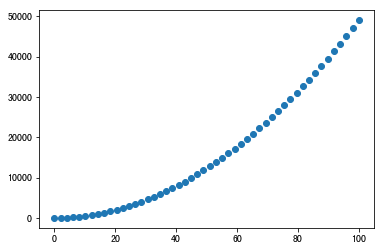

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(disp['t'], disp['s'])

In [58]:
poly = PolynomialFeatures(2)
t_poly = poly.fit_transform(disp[['t']])
t_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 4.08163265e+00, 1.66597251e+01],
       [1.00000000e+00, 6.12244898e+00, 3.74843815e+01],
       [1.00000000e+00, 8.16326531e+00, 6.66389005e+01],
       [1.00000000e+00, 1.02040816e+01, 1.04123282e+02],
       [1.00000000e+00, 1.22448980e+01, 1.49937526e+02],
       [1.00000000e+00, 1.42857143e+01, 2.04081633e+02],
       [1.00000000e+00, 1.63265306e+01, 2.66555602e+02],
       [1.00000000e+00, 1.83673469e+01, 3.37359434e+02],
       [1.00000000e+00, 2.04081633e+01, 4.16493128e+02],
       [1.00000000e+00, 2.24489796e+01, 5.03956685e+02],
       [1.00000000e+00, 2.44897959e+01, 5.99750104e+02],
       [1.00000000e+00, 2.65306122e+01, 7.03873386e+02],
       [1.00000000e+00, 2.85714286e+01, 8.16326531e+02],
       [1.00000000e+00, 3.06122449e+01, 9.37109538e+02],
       [1.00000000e+00, 3.26530612e+01, 1.06622241e+03],
       [1.00000000e+00, 3.46938

In [62]:
disp["t2"] = t_poly[:, 2]
disp.head()

,s,t,t2
0,0.000000,0.000000,0.000000
1,20.408163,2.040816,4.164931
2,81.632653,4.081633,16.659725
3,183.673469,6.122449,37.484382
4,326.530612,8.163265,66.638900


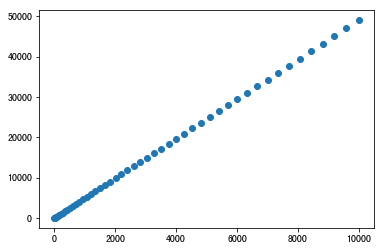

In [63]:
plt.scatter(disp['t2'], disp['s'])    #从图中可以看出，很明显的直线了。于是伟大的s=1/2 * g * t^2被发现了。

#### 5. 离散化
离散化是数值型特征非常重要的一个处理，其实就是要将数值型数据转化成类别型数据

连续值的取值空间可能是无穷的，为了便于表示和在模型中处理，需要对连续值特征进行离散化处理
在工业界，很少直接将连续值作为特征喂给逻辑回归模型，而是将连续特征离散化为一系列0、1特征交给逻辑回归模型，这样做的优势有以下几点：

- 稀疏向量内积乘法运算速度快，计算结果方便存储，容易scalable（扩展）。
- 离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰。
- Logistic回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合。
- 离散化后可以进行特征交叉，由M N个变量变为M*N个变量，进一步引入非线性，提升表达能力。
- 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问。


常用的离散化方法包括等值划分和等量划分。
1. 等值划分是将特征按照值域进行均分，每一段内的取值等同处理。例如某个特征的取值范围为[0，10]，我们可以将其划分为10段，[0，1)，[1,2)，...，[9，10)。

2. 等量划分是根据样本总数进行均分，每段等量个样本划分为1段。例如距离特征，取值范围［0，3000000］，现在需要切分成10段，如果按照等比例划分的话，会发现绝大部分样本都在第1段中。使用等量划分就会避免这种问题，最终可能的切分是[0，100)，[100，300)，[300，500)，..，[10000，3000000]，前面的区间划分比较密，后面的比较稀疏


In [137]:
ages = np.array([20, 22,25,27,21,23,37,31,61,45,41,32]) #一些年龄数据
# 通过 pandas中的cut方法可以分割数据
# factory = pd.cut(ages,4)     #arr原始数据 , 4：要分割成几段
factory = pd.cut(ages,4,labels=['Youth', 'YoungAdult', 'MiddleAged', 'Senior']) #lable，对于每个类别可以自己命名
# factory = pd.cut(arr,bins=[18,25,35,60,100],labels=['a','b','c','d']) #bins 自己指定的分割界限
# factory.dtype  #CategoricalDtype，可以看到，cut后返回的是一个Categorical 类型的对象
test = np.array(factory)  #获取出分类后的数据
test


array(['Youth', 'Youth', 'Youth', 'Youth', 'Youth', 'Youth', 'YoungAdult',
       'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult'],
      dtype=object)

In [138]:
# 下面看下等量划分
# 通过 pandas中的qcut方法可以分割数据
factory = pd.qcut(ages,4) 
# factory
factory.value_counts()   #可以看到，通过等量划分，每个类别中的数据个数都一样


(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

### 文本数据的特征工程

在自然语言处理和文本分析的问题中，词袋（Bag of Words, BOW）和词向量（Word Embedding）是两种最常用的模型。

#### 词袋

假设一句文本，先进行分词，然后将这些词语作为一个集合，称之为“词袋”

但是在算法中无法使用这些词汇，必须要将这些词数字化，即给每个词一个数字，这样词袋就编程了一些数字的集合。

In [73]:
text = ["You raise me up You raise me up", 
        "so I can stand on mountains",
        "You raise me up", 
        "to walk on stormy seas",
        "I am strong", 
        "when I am on your shoulders",
        "You raise me up",
        "To more than I can be"]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_data = vectorizer.fit_transform(text)
train_data.toarray()

array([[0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

In [74]:
vocab = vectorizer.get_feature_names()
pd.DataFrame(train_data.toarray(), columns=vocab)

,am,be,can,me,more,mountains,on,raise,seas,shoulders,...,stand,stormy,strong,than,to,up,walk,when,you,your
0,0,0,0,2,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,2,0
1,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [75]:
#中文词袋，要先做分词
text = ['国际著名综合类科学期刊美国科学院院刊在线', 
        '发表了苏州大学数学科学学院系统生物学研究中心马欢飞副教授研究课题组的课题',
        '马欢飞副教授是该论文第一作者',
        '苏州大学数学科学学院是唯一第一作者单位',
        '这是我校首次在PNAS发表数学类论文']

import jieba
train_data = [" ".join(jieba.cut(word)) for word in text]
train_data

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/gj/603w6p3505j5jp2sv_vl7lz40000gn/T/jieba.cache
Loading model cost 1.047 seconds.
Prefix dict has been built succesfully.


['国际 著名 综合类 科学 期刊 美国科学院 院刊 在线',
 '发表 了 苏州大学 数学 科学 学院 系统 生物学 研究 中心 马欢 飞 副教授 研究 课题组 的 课题',
 '马欢 飞 副教授 是 该 论文 第一 作者',
 '苏州大学 数学 科学 学院 是 唯一 第一 作者 单位',
 '这是 我校 首次 在 PNAS 发表 数学 类 论文']

In [76]:
vect = CountVectorizer()
train_counts = vect.fit_transform(train_data)
words = vect.get_feature_names()
pd.DataFrame(train_counts.toarray(), columns=words)

,pnas,中心,作者,副教授,单位,发表,唯一,国际,在线,学院,...,美国科学院,苏州大学,著名,论文,课题,课题组,这是,院刊,首次,马欢
0,0,0,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


根据词语的出现次数来构建词袋会出现一个问题：长的文章词语出现的次数会比短的文章要多，而实际上两篇文章可能谈论的都是同一个主题。

于是乎，我们用tf（term frequencies）——单词出现次数除以文章总单词数——这样的方法来代替出现次数来构建词袋字典。

In [77]:
text = ["You raise me up You raise me up", 
        "so I can stand on mountains",
        "You raise me up", 
        "to walk on stormy seas",
        "I am strong", 
        "when I am on your shoulders",
        "You raise me up",
        "To more than I can be"]
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1.)
tv_array = tv.fit_transform(text).toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_array, 2), columns=vocab)

,am,be,can,me,more,mountains,on,raise,seas,shoulders,...,stand,stormy,strong,than,to,up,walk,when,you,your
0,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
1,0.00,0.00,0.41,0.0,0.00,0.49,0.35,0.0,0.00,0.00,...,0.49,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
2,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
3,0.00,0.00,0.00,0.0,0.00,0.00,0.35,0.0,0.49,0.00,...,0.00,0.49,0.00,0.00,0.41,0.0,0.49,0.00,0.0,0.00
4,0.64,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.77,0.00,0.00,0.0,0.00,0.00,0.0,0.00
5,0.41,0.00,0.00,0.0,0.00,0.00,0.35,0.0,0.00,0.49,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.49,0.0,0.49
6,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
7,0.00,0.48,0.40,0.0,0.48,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.48,0.40,0.0,0.00,0.00,0.0,0.00


In [89]:
#示例
#读取sklearn中的文本数据集
#方法1
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [85]:
#方法2
from sklearn import datasets
twenty_train = datasets.load_files("/Users/qiwsir/Documents/Codes/DataSet/20newsbydate/20news-bydate-test")

In [87]:
#显示分类名称
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [92]:
#使用朴素贝叶斯分类,并做出简单的预测
from sklearn.naive_bayes import MultinomialNB 
#进行训练的过程。 
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target) 
docs_new = ['God is love', 'OpenGL on the GPU is fast'] 
X_new_counts = count_vect.transform(docs_new) 
X_new_tfidf = tfidf_transformer.transform(X_new_counts) 
#重要的一行在这里，这是进行预测的过程。 
predicted = clf.predict(X_new_tfidf) 
for doc, category in zip(docs_new, predicted): 
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => rec.autos


词向量，英文名叫Word Embedding，按照字面意思，应该是词嵌入。

Google的Word2Vec，关于它的介绍：

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.


另外，用Keras之类的框架还有一个Embedding层，也说是将词ID映射为向量。

由于先入为主的意识，大家可能就会将词向量跟Word2Vec等同起来，而反过来问“Embedding是哪种词向量？”这类问题，尤其是对于初学者来说，应该是很混淆的。

### 时间类型的特征

通常将时间转化为类别属性的特征

- hour of the day (24 boolean features)
- day of the week (7 boolean features)
- day of the month (up to 31 boolean features)
- month of the year (12 boolean features)
- year (as many boolean features as they are different years in your dataset)

可以把时间转换成连续值，也可以转换成离散值。

- 连续值：比如持续时间（单页浏览时长），间隔时间（上次购买/点击离现在的时间）
- 离散值：比如一天中哪个时间段(hour_0-23) ，一周中星期几(week_monday...) ，一年中哪个星期 ，工作日/周末 ， 一年中哪个季度 等

In [95]:
#自行车租赁数据
bikes = pd.read_csv('/Users/qiwsir/Documents/Codes/DataSet/kaggle/bike_sharing_train.csv', header = 0, error_bad_lines=False)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [103]:
#对特征datatime进行分解

#data = bikes.iloc[:,:1]     #只看datatime这个属性
daata = bikes.loc[:, ("datetime")]
temp = pd.DatetimeIndex(data['datetime'])    #创建时间索引
data['date'] = temp.date  #日期  
data['time'] = temp.time  #时间
data['year'] = temp.year  #年
data['month'] = temp.month #月
data['day'] = temp.day #日
data['hour'] = temp.hour #小时
data['dayofweek'] = temp.dayofweek  #具体星期几
data['dateDays'] = (data.date - data.date[0]) #生成一个时间长度特征  ['0days','0days',...,'1days',...]
data['dateDays'] = data['dateDays'].astype('timedelta64[D]')  #转换成float型
data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,datetime,date,time,year,month,day,hour,dayofweek,dateDays
0,2011-01-01 00:00:00,2011-01-01,00:00:00,2011,1,1,0,5,0.0
1,2011-01-01 01:00:00,2011-01-01,01:00:00,2011,1,1,1,5,0.0
2,2011-01-01 02:00:00,2011-01-01,02:00:00,2011,1,1,2,5,0.0
3,2011-01-01 03:00:00,2011-01-01,03:00:00,2011,1,1,3,5,0.0
4,2011-01-01 04:00:00,2011-01-01,04:00:00,2011,1,1,4,5,0.0
5,2011-01-01 05:00:00,2011-01-01,05:00:00,2011,1,1,5,5,0.0
6,2011-01-01 06:00:00,2011-01-01,06:00:00,2011,1,1,6,5,0.0
7,2011-01-01 07:00:00,2011-01-01,07:00:00,2011,1,1,7,5,0.0
8,2011-01-01 08:00:00,2011-01-01,08:00:00,2011,1,1,8,5,0.0
9,2011-01-01 09:00:00,2011-01-01,09:00:00,2011,1,1,9,5,0.0


### 特征标准化

#### 1. z-score标准化（标准差标准化）

数据标准化是将样本的属性缩放到某个指定的范围，标准化的原因在于：

- 某些算法要求数据具有零均值和单位方差。
- 样本不同特征有不同的量级和单位。所有依赖于样本距离的算法（如KNN）对于数据的数量级都非常敏感。量级大的特征属性将占主导地位，且量级的差异会导致迭代速度减慢。为了消除量级的影响，必须进行数据标准化。

标准化公式为： x_std = (x - mean) / std

In [106]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [107]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [110]:
from sklearn.preprocessing import StandardScaler 
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(iris.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

#### 2. 区间缩放（Min-max 标准化，离差标准化）

常见的一种为利用两个最值min、max进行缩放，

公式：x2 = (x - min) / (max - min)

In [111]:
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(iris.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

#### 归一化（正则化）

将样本某个范数缩放到单位1，是针对单个样本的，对于每个样本将样本缩放到单位范数。其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准。


In [112]:
from sklearn.preprocessing import Normalizer 
#归一化，返回值为归一化后的数据
Normalizer().fit_transform(iris.data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

StandardScaler和Normalizer这个两个概念的问题(大家翻译上的误差导致信息非常混乱)，

其实StandardScaler就是尺寸缩放问题，即使同一特征下的数值在一定范围内浮动，如将数值所放在0-1范围内(MinMaxScaler), 或者将数据标准化成为均值为0，方差为1的数据(Z-score)；

Normalizer，将同一行数据的不同特征进行规范化，这样一个数据的不同特征具有相同的量纲或者表现力，比如说一个特征是身高，1.7m，体重为150斤，那么两个特征之间差距太大，身高这个特征变化根本无法起到决定作用(在体重这个变化特征下)，毕竟大家怎么长都是一米多，但是体重差距一下子拉开20多是很正常的事

### 特征选择

根据特征选择的形式又可以将特征选择方法分为3种：

- Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

#### 1. 过滤法
过滤法主要思想是：按照发散性或者相关性对各个特征进行对每一维的特征“打分”，即给每一维的特征赋予权重，这样的权重就代表着该维特征的重要性，设定阈值或者待选择阈值的个数，选择特征。


In [113]:
# 移除低方差的特征 (Removing features with low variance)
from sklearn.feature_selection import VarianceThreshold 
#方差选择法，返回值为特征选择后的数据 
#参数threshold为方差的阈值 
VarianceThreshold(threshold=3).fit_transform(iris.data) 

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [114]:
# --- 例子 ，比如第一列的特征，只有一个为1的，那这个特征几乎是无用的，可以砍掉 --- 
from sklearn.feature_selection import VarianceThreshold 
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]) 
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [118]:
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

单变量特征选择 (Univariate feature selection)

单变量特征选择能够对每一个特征进行测试，衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。对于回归和分类问题可以采用卡方检验等方式对特征进行测试。

方法简单，易于运行，易于理解，通常对于理解数据有较好的效果（但对特征优化、提高泛化能力来说不一定有效）；这种方法有许多改进的版本、变种。

In [119]:
#卡方(Chi2)检验
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
#选择K个最好的特征，返回选择特征后的数据 
SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [120]:
# --- 例子 --- 
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
iris = load_iris() 
X, y = iris.data, iris.target 
X.shape

(150, 4)

In [121]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [125]:
# Pearson相关系数 (Pearson Correlation),适用于：回归问题(y连续)
import numpy as np 
from scipy.stats import pearsonr 
np.random.seed(0) 
size = 300 
x = np.random.normal(0, 1, size) 
# pearsonr(x, y)的输入为特征矩阵和目标向量 
# np.random.normal(0, 1, 100) 创建100个均值为0，方差为1的高斯随机数 
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size))) 
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size))) 

Lower noise (0.7182483686213841, 7.32401731299835e-49)
Higher noise (0.057964292079338155, 0.3170099388532475)


其它方法：
- 互信息和最大信息系数 (Mutual information and maximal information coefficient (MIC)
- 距离相关系数 (Distance Correlation)

#### 2 Wrapper（包装）

包装法主要思想是：根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。也可以将特征子集的选择看作是一个搜索寻优问题，生成不同的组合，对组合进行评价，再与其他的组合进行比较。这样就将子集的选择看作是一个是一个优化问题，这里有很多的优化算法可以解决，尤其是一些启发式的优化算法，如GA，PSO，DE，ABC等，详见“优化算法—人工蜂群算法(ABC)”，“优化算法—粒子群算法(PSO)”。

In [124]:
#Logistic特征消除法
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

#递归特征消除法，返回特征选择后的数据 
#参数estimator为基模型 
#参数n_features_to_select为选择的特征个数 
RFE(estimator=LogisticRegression(), n_features_to_select=2).fit_transform(iris.data, iris.target)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.2],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.6, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

### 3 Embedded（嵌入）

嵌入法主要思想是：使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。其实是讲在确定模型的过程中，挑选出那些对模型的训练有重要意义的属性。


In [126]:
#基于惩罚项的特征选择法
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegression 
#带L1惩罚项的逻辑回归作为基模型的特征选择 
SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(iris.data, iris.target)
# 这里的惩罚项是L1,别看做是11，这里L是小写

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [128]:
# --- 例子，这里用支持向量机了 --- 
from sklearn.svm import LinearSVC 
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectFromModel 
iris = load_iris() 
X, y = iris.data, iris.target 

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y) 
# 这里的惩罚项是L1,别看做是11，这里L是小写 
model = SelectFromModel(lsvc, prefit=True) 
X_new = model.transform(X) 
X_new[:10,:] # 前10行


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5]])

In [129]:
#基于树模型的特征选择法
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import GradientBoostingClassifier 
#GBDT作为基模型的特征选择 
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [130]:
# --- 例子：这里用了随机森林了 --- 
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier()
clf = clf.fit(X, y)
clf.feature_importances_   # 显示每一个特征的重要性指标，越大说明越重要，可以看出，第三第四两个特征比较重要

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.13402564, 0.02702027, 0.40977221, 0.42918188])

In [131]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

## 降维

当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。

常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有：

- 主成分分析法（PCA）
- 线性判别分析（LDA），线性判别分析本身也是一个分类模型。

PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。

In [132]:
#主成分分析法（PCA）
from sklearn.decomposition import PCA

#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
PCA(n_components=2).fit_transform(iris.data)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

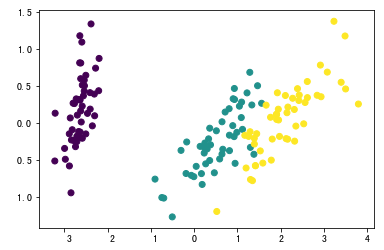

In [134]:
%matplotlib inline
# --- 例子 --- 
from sklearn.decomposition import PCA,KernelPCA 

import matplotlib.pyplot as plt 

category = pd.Categorical(iris.target) # 将标签进行量化，就是说本来都是字符串啊，但是最后计算的时候都需要量化成1，2，3类等 
pca_2c = PCA(n_components=2) # 使用PCA降到2维 
#pca_2c = KernelPCA(n_components=2) 

x_pca_2c = pca_2c.fit_transform(iris.data) 
x_pca_2c.shape 
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=category.codes)


In [136]:
#线性判别分析法（LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
LinearDiscriminantAnalysis(n_components=2).fit_transform(iris.data, iris.target)

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.